# Sentiment Analysis dari Text Berbahasa Indonesia

## Sentiment Analysis menggunakan Library NLTK

In [1]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install pycaret --ignore-installed

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.2-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached pyod-2.0.5-py3-none-any.whl.metadata (46 kB)
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached category_encoders-2.8.1-py3-none-any.whl.metadata (7.9 kB)
  Using cached lightgbm-4.6.0-py3-none-manylinux_2_28_x86_64.whl.metadata (17 kB)
  Using cached numba-0.62.1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 

In [4]:
!pip install numpy


[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


### Data Preprocessing

In [5]:
import pandas as pd

In [6]:
dfcorpus = pd.read_csv('https://raw.githubusercontent.com/condro-ui/sentiment-analysis-mandalika/refs/heads/main/labeling_dataset.csv')

In [7]:
dfcorpus.head(10)

,caption,created_at,event_sentiment,circuit_sentiment
0,"""Five years ago, I had my most serious acciden...",2025-07-20 14.40.42,neutral,neutral
1,Legenda balap motor Valentino Rossi tiba di Ja...,2025-09-30 20.54.12,positive,neutral
2,Menyusuri Sejarah Motorsport Indonesia di Muse...,2025-10-06 19.08.19,neutral,neutral
3,Menteri Pemuda dan Olahraga Erick Thohir menye...,2025-10-05 12.39.53,positive,positive
4,Momen Pacu Jalur Rayyan Arkan Dikha Guncang Ma...,2025-10-04 20.21.14,positive,neutral
5,Ini sih bukan Circuit terbaik di lokal area ta...,2022-11-09 08.51.31,neutral,positive
6,Nonton MotoGP tiket Grandstand A. Pengalaman y...,2024-11-08 08.51.31,positive,positive
7,"The livery voted by YOU, the fans 🫵\n\nPASSION...",2025-10-02 16.50.45,neutral,neutral
8,"Nonton MotoGP dari Bukit Niti, cakeepp!\n\nThe...",2025-10-10 14.24.01,positive,positive
9,BRI dukung MotoGP Mandalika 2025 dengan layana...,2025-10-05 13.47.27,positive,neutral


In [8]:
dfcorpus.describe(include='all')

,caption,created_at,event_sentiment,circuit_sentiment
count,3000,3000,3000,3000
unique,2971,2618,3,3
top,Welcome to MandalikaGP Indonesia 🇮🇩 @motogp ...,2022-11-09 08.51.31,neutral,neutral
freq,3,158,1451,2257


In [11]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


In [12]:
# Library NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [13]:
!pip install Sastrawi


[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


#### Slang Words

In [14]:
!pip install indonlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.9 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


In [15]:
from indoNLP.preprocessing import emoji_to_words, replace_slang, pipeline

In [16]:
handle_slang = pipeline([emoji_to_words, replace_slang])

In [17]:
dfcorpus['caption'] = dfcorpus['caption'].apply(str).apply(handle_slang)

In [18]:
dfcorpus.head()

,caption,created_at,event_sentiment,circuit_sentiment
0,"""Five years ago, I had my most serious acciden...",2025-07-20 14.40.42,neutral,neutral
1,Legenda balap motor Valentino Rossi tiba di Ja...,2025-09-30 20.54.12,positive,neutral
2,Menyusuri Sejarah Motorsport Indonesia di Muse...,2025-10-06 19.08.19,neutral,neutral
3,Menteri Pemuda dan Olahraga Erick Thohir menye...,2025-10-05 12.39.53,positive,positive
4,Momen Pacu Jalur Rayyan Arkan Dikha Guncang Ma...,2025-10-04 20.21.14,positive,neutral


#### Tokenisasi

In [19]:
import re

In [20]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
html_str = r'<[^>]+>'
mention_str = r'(?:@[\w_]+)'
mention2_str = r'(?:@[^\w\s])'
and_str = r'(?:&[\w_]+)'
hash_str = r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)"
url_str = r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+'
num_str = r'(?:(?:\d+,?)+(?:\.?\d+)?)'
dash_str = r"(?:[a-z][a-z'\-_]+[a-z])"
other_str = r'(?:[\w_]+)'
any_str = r'(?:\S)'

regex_str = []
regex_str.append(emoticons_str)
regex_str.append(html_str)# HTML tags
regex_str.append(mention_str)# @-mentions
regex_str.append(mention2_str)# @-mentions2
regex_str.append(and_str) # word with &
regex_str.append(hash_str) # hash-tags
regex_str.append(url_str) # URLs
regex_str.append(num_str) # numbers
regex_str.append(dash_str) # words with - and '
regex_str.append(other_str) # other words
regex_str.append(and_str) # anything else

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

In [21]:
def tokenize(s):
    tokens = tokens_re.findall(s)
    return tokens

In [22]:
tokens = []
for c in dfcorpus['caption'].to_list():
    tokens.append(tokenize(c.lower()))

In [23]:
tokens[0]

['five',
 'years',
 'ago',
 'i',
 'had',
 'my',
 'most',
 'serious',
 'accident',
 'not',
 'ini',
 'absolute',
 'terms',
 'but',
 'because',
 'of',
 'the',
 'wrong',
 'choices',
 'i',
 'made',
 'i',
 'came',
 'back',
 'too',
 'early',
 'and',
 'then',
 'everything',
 'got',
 'worse',
 'ini',
 'those',
 'three',
 'orang',
 'four',
 'years',
 'when',
 'i',
 'missed',
 'the',
 'chance',
 'tapi',
 'fight',
 'for',
 'the',
 'world',
 'championship',
 'i',
 'learned',
 'a',
 'lot',
 'about',
 'my',
 'life',
 'and',
 'sok',
 'itu',
 'changed',
 'my',
 'character',
 'a',
 'bit',
 "i'sama",
 'proud',
 'tapi',
 'continue',
 'growing',
 'ini',
 'life',
 'marc',
 'marquez',
 'source',
 'tnt',
 'sports']

#### Stop Word Removal

In [24]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 3.9 MB/s eta 0:00:00:00:010:01

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


In [25]:
import emoji

In [26]:
from Sastrawi.StopWordRemover import StopWordRemoverFactory

In [27]:
import string

In [28]:
swf = StopWordRemoverFactory.StopWordRemoverFactory()

In [29]:
stopwords = swf.get_stop_words()

In [30]:
stopwords[:10]

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua']

In [31]:
punctuation = list(string.punctuation)

In [32]:
rem_others = ['rt', 'via', '…','•','“','','â']

In [33]:
rem_words = stopwords+punctuation+rem_others

In [34]:
exclude_str = []
exclude_str.append(emoticons_str)
exclude_str.append(html_str)# HTML tags
exclude_str.append(mention_str)# @-mentions
exclude_str.append(mention2_str)# @-mentions space
exclude_str.append(and_str)
exclude_str.append(hash_str) # hash-tags
exclude_str.append(url_str) # URLs
exclude_str.append(num_str) # numbers
exclude_str.append(r'(\b[a-zA-Z0-9]{2,3}\b)') # 2 or 3 char
exclude_re = re.compile(r'('+'|'.join(exclude_str)+')', re.VERBOSE | re.IGNORECASE)

In [35]:
# Fungsi untuk melakukan stop word removal
def cleanTweet(token,regex):
    nstoken = [t for t in token if t not in rem_words]
    terms_all = [emoji.demojize(term).lower() for term in nstoken if not regex.match(term.lower()) and len(term)>2]
    return terms_all

In [36]:
cleantweets = [cleanTweet(token, exclude_re) for token in tokens]

In [37]:
cleantweets[:10]

[['five',
  'years',
  'most',
  'serious',
  'accident',
  'absolute',
  'terms',
  'because',
  'wrong',
  'choices',
  'made',
  'came',
  'back',
  'early',
  'then',
  'everything',
  'worse',
  'those',
  'three',
  'orang',
  'four',
  'years',
  'when',
  'missed',
  'chance',
  'fight',
  'world',
  'championship',
  'learned',
  'about',
  'life',
  'changed',
  'character',
  "i'sama",
  'proud',
  'continue',
  'growing',
  'life',
  'marc',
  'marquez',
  'source',
  'sports'],
 ['legenda',
  'balap',
  'motor',
  'valentino',
  'rossi',
  'tiba',
  'jakarta',
  'jelang',
  'penyelenggaraan',
  'motogp',
  'mandalika',
  'akhir',
  'pekan',
  'mendatang',
  'rossi',
  'mendarat',
  'bandar',
  'udara',
  'soekarno-hatta',
  'senin',
  'pukul',
  'sosok',
  'punya',
  'julukan',
  'doctor',
  'mendapat',
  'sambutan',
  'hangat',
  'bandara',
  'kedatangan',
  'rossi',
  'ditunggu-tunggu',
  'bahkan',
  'membawa',
  'helm',
  'ditandatangani',
  'pembalap',
  'punya',
  'se

#### Stemming/ Lemtization

In [38]:
from Sastrawi.Stemmer import StemmerFactory

In [39]:
stemf = StemmerFactory.StemmerFactory()

In [40]:
stemmer = stemf.create_stemmer()

In [41]:
stemmer.stem("saya dan dia kemarin pegi ke pasar bersama untuk mencari sesuatu yg menyenangkan")

'saya dan dia kemarin pegi ke pasar sama untuk cari sesuatu yg senang'

In [42]:
stemtokens = [stemmer.stem(" ".join(t)).split() for t in cleantweets]

#### Term Frequency

In [43]:
# Menghitung frekwensi kata
all_word=[]
from collections import Counter
count_all = Counter()
for cleanToken in stemtokens:
    terms_all = [term.lower() for term in cleanToken]
    count_all.update(terms_all)
    for w in terms_all:
        all_word.append(w)
print(count_all.most_common(100))

[('mandalika', 2340), ('motogp', 2000), ('indonesia', 674), ('sirkuit', 605), ('balap', 476), ('marquez', 418), ('bendera', 390), ('wajah', 367), ('marc', 357), ('tonton', 310), ('lombok', 296), ('jadi', 286), ('race', 286), ('dunia', 204), ('sama', 192), ('enggak', 177), ('pertamina', 176), ('motor', 175), ('circuit', 165), ('mata', 165), ('juara', 158), ('dengan', 156), ('tahun', 152), ('bezzecchi', 151), ('langsung', 144), ('gelar', 138), ('menang', 135), ('sprint', 128), ('hati', 126), ('buat', 126), ('moto', 121), ('internasional', 119), ('kotak', 118), ('ducati', 116), ('sangat', 115), ('hari', 113), ('aldeguer', 113), ('siap', 112), ('kali', 111), ('grand', 111), ('tangan', 108), ('jalan', 108), ('prix', 108), ('pertama', 107), ('baik', 105), ('international', 105), ('hasil', 104), ('lihat', 103), ('marco', 102), ('oktober', 102), ('banyak', 101), ('bangga', 99), ('tiket', 98), ('orang', 97), ('senyum', 97), ('atas', 96), ('lebih', 96), ('kamera', 95), ('akhir', 94), ('with', 93

In [44]:
len(all_word)

45217

#### POS Tagger

##### Melatih model POS Tagger
opsional, dapat juga menggunakan model yang sudah disediakan

Kita skip

In [45]:
import flair.datasets
corpus = flair.datasets.UD_INDONESIAN()

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'Could not load this library: /usr/local/lib/python3.10/dist-packages/torchvision/image.so'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


2025-11-09 17:32:28,765 https://raw.githubusercontent.com/UniversalDependencies/UD_Indonesian-GSD/master/id_gsd-ud-dev.conllu not found in cache, downloading to /tmp/tmphd_5dqsl


970kB [00:00, 16.8MB/s]                   

2025-11-09 17:32:28,930 copying /tmp/tmphd_5dqsl to cache at /root/.flair/datasets/ud_indonesian/id_gsd-ud-dev.conllu
2025-11-09 17:32:28,932 removing temp file /tmp/tmphd_5dqsl


2025-11-09 17:32:29,274 https://raw.githubusercontent.com/UniversalDependencies/UD_Indonesian-GSD/master/id_gsd-ud-test.conllu not found in cache, downloading to /tmp/tmpv83tt1gn


904kB [00:00, 16.2MB/s]                   

2025-11-09 17:32:29,425 copying /tmp/tmpv83tt1gn to cache at /root/.flair/datasets/ud_indonesian/id_gsd-ud-test.conllu
2025-11-09 17:32:29,427 removing temp file /tmp/tmpv83tt1gn


2025-11-09 17:32:30,371 https://raw.githubusercontent.com/UniversalDependencies/UD_Indonesian-GSD/master/id_gsd-ud-train.conllu not found in cache, downloading to /tmp/tmpg7a9kyb6


7.32MB [00:00, 47.2MB/s]                   

2025-11-09 17:32:30,638 copying /tmp/tmpg7a9kyb6 to cache at /root/.flair/datasets/ud_indonesian/id_gsd-ud-train.conllu
2025-11-09 17:32:30,642 removing temp file /tmp/tmpg7a9kyb6
2025-11-09 17:32:30,649 Reading data from /root/.flair/datasets/ud_indonesian
2025-11-09 17:32:30,650 Train: /root/.flair/datasets/ud_indonesian/id_gsd-ud-train.conllu
2025-11-09 17:32:30,650 Dev: /root/.flair/datasets/ud_indonesian/id_gsd-ud-dev.conllu
2025-11-09 17:32:30,651 Test: /root/.flair/datasets/ud_indonesian/id_gsd-ud-test.conllu


In [46]:
type(corpus)

flair.datasets.treebanks.UD_INDONESIAN

In [47]:
tag_type = 'upos'
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)

/tmp/ipykernel_511/3418903033.py:2: DeprecationWarning: Call to deprecated method make_tag_dictionary. (Use 'make_label_dictionary' instead.) -- Deprecated since version 0.8.
  tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)


In [48]:
for t in corpus.train:
    print(t)

Sentence[18]: "Sembungan adalah sebuah desa yang terletak di kecamatan Kejajar, kabupaten Wonosobo, Jawa Tengah, Indonesia." → ["Sembungan"/sembungan/PROPN/X--/nsubj, "adalah"/adalah/AUX/O--/cop, "sebuah"/buah/DET/B--/det/Ind/Art, "desa"/desa/NOUN/NSD/root/Sing, "yang"/yang/PRON/S--/nsubj:pass/Rel, "terletak"/letak/VERB/VSP/acl:relcl/Ind/Pass, "di"/di/ADP/R--/case, "kecamatan"/camat/NOUN/NSD/obl/Sing, "Kejajar"/kejajar/PROPN/X--/nmod, ","/,/PUNCT/Z--/punct, "kabupaten"/kabupaten/NOUN/NSD/appos/Sing, "Wonosobo"/wonosobo/PROPN/X--/nmod, ","/,/PUNCT/Z--/punct, "Jawa"/jawa/PROPN/NSD/appos, "Tengah"/tengah/PROPN/NSD/amod, ","/,/PUNCT/Z--/punct, "Indonesia"/indonesia/PROPN/NSD/appos, "."/./PUNCT/Z--/punct]
Sentence[22]: "Sebuah serangan pengayauan biasanya terjadi di ladang atau dengan membakar sebuah rumah dan memenggal semua penghuninya ketika mereka melarikan diri." → ["Sebuah"/buah/DET/B--/det/Ind/Art, "serangan"/serang/NOUN/NSD/nsubj/Sing, "pengayauan"/pengayauan/NOUN/X--/compound, "bia

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [49]:
pip install flair[word-embeddings]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.6/27.6 MB 98.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 8.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings
from typing import List
embedding_types: List[TokenEmbeddings] = [
 WordEmbeddings('id-crawl'),
 WordEmbeddings('id'),
]
embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

2025-11-09 17:33:12,005 https://flair.informatik.hu-berlin.de/resources/embeddings/token/id-crawl-fasttext-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmpw8pirfdt


100%|██████████| 1.12G/1.12G [00:56<00:00, 21.2MB/s]  

2025-11-09 17:34:09,338 copying /tmp/tmpw8pirfdt to cache at /root/.flair/embeddings/id-crawl-fasttext-300d-1M.vectors.npy


2025-11-09 17:34:09,690 removing temp file /tmp/tmpw8pirfdt
2025-11-09 17:34:10,635 https://flair.informatik.hu-berlin.de/resources/embeddings/token/id-crawl-fasttext-300d-1M not found in cache, downloading to /tmp/tmpxaytbw6m


100%|██████████| 37.8M/37.8M [00:02<00:00, 16.8MB/s]

2025-11-09 17:34:13,696 copying /tmp/tmpxaytbw6m to cache at /root/.flair/embeddings/id-crawl-fasttext-300d-1M
2025-11-09 17:34:13,715 removing temp file /tmp/tmpxaytbw6m


2025-11-09 17:34:24,257 https://flair.informatik.hu-berlin.de/resources/embeddings/token/id-wiki-fasttext-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmpzxm3e5st


100%|██████████| 344M/344M [00:16<00:00, 22.5MB/s]   

2025-11-09 17:34:40,742 copying /tmp/tmpzxm3e5st to cache at /root/.flair/embeddings/id-wiki-fasttext-300d-1M.vectors.npy


2025-11-09 17:34:40,876 removing temp file /tmp/tmpzxm3e5st
2025-11-09 17:34:41,406 https://flair.informatik.hu-berlin.de/resources/embeddings/token/id-wiki-fasttext-300d-1M not found in cache, downloading to /tmp/tmpjp880qs0


100%|██████████| 11.1M/11.1M [00:01<00:00, 9.37MB/s]

2025-11-09 17:34:43,139 copying /tmp/tmpjp880qs0 to cache at /root/.flair/embeddings/id-wiki-fasttext-300d-1M


2025-11-09 17:34:43,149 removing temp file /tmp/tmpjp880qs0


In [51]:
from flair.models import SequenceTagger

In [52]:
tagger: SequenceTagger = SequenceTagger(hidden_size=256, embeddings=embeddings, tag_dictionary=tag_dictionary, tag_type=tag_type,use_crf=True)

2025-11-09 17:34:54,756 SequenceTagger predicts: Dictionary with 20 tags: O, PROPN, AUX, DET, NOUN, PRON, VERB, ADP, PUNCT, ADV, CCONJ, SCONJ, NUM, ADJ, PART, SYM, INTJ, X, <START>, <STOP>


In [53]:
from flair.trainers import ModelTrainer
trainer: ModelTrainer = ModelTrainer(tagger, corpus)
trainer.train('resources/taggers/example-universal-pos',learning_rate=0.1,mini_batch_size=32,max_epochs=3)

2025-11-09 17:35:04,286 ----------------------------------------------------------------------------------------------------
2025-11-09 17:35:04,287 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'id-crawl'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_1): WordEmbeddings(
      'id'
      (embedding): Embedding(300686, 300)
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=600, out_features=600, bias=True)
  (rnn): LSTM(600, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=20, bias=True)
  (loss_function): ViterbiLoss()
  (crf): CRF()
)"
2025-11-09 17:35:04,288 ----------------------------------------------------------------------------------------------------
2025-11-09 17:35:04,289 Corpus: 4482 train + 559 dev + 557 test sentences
2025-11-09 17:35:04,290 ---------------------------------

/usr/local/lib/python3.10/dist-packages/flair/trainers/trainer.py:545: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=use_amp and flair.device.type != "cpu")


2025-11-09 17:35:07,024 epoch 1 - iter 14/141 - loss 2.64370391 - time (sec): 2.72 - samples/sec: 3776.46 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:35:08,651 epoch 1 - iter 28/141 - loss 2.35336056 - time (sec): 4.35 - samples/sec: 4554.94 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:35:10,434 epoch 1 - iter 42/141 - loss 2.12457173 - time (sec): 6.13 - samples/sec: 4805.92 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:35:12,266 epoch 1 - iter 56/141 - loss 1.95758604 - time (sec): 7.96 - samples/sec: 4934.12 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:35:14,390 epoch 1 - iter 70/141 - loss 1.82284518 - time (sec): 10.09 - samples/sec: 4854.58 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:35:16,399 epoch 1 - iter 84/141 - loss 1.70950871 - time (sec): 12.10 - samples/sec: 4858.42 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:35:18,441 epoch 1 - iter 98/141 - loss 1.61341913 - time (sec): 14.14 - samples/sec: 4839.34 - lr: 0.100000 - momentum: 0.000000
202

100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

2025-11-09 17:35:27,809 DEV : loss 0.552151083946228 - f1-score (micro avg)  0.8302
2025-11-09 17:35:27,871  - 0 epochs without improvement
2025-11-09 17:35:27,880 saving best model


2025-11-09 17:35:34,450 ----------------------------------------------------------------------------------------------------
2025-11-09 17:35:36,142 epoch 2 - iter 14/141 - loss 0.77716911 - time (sec): 1.69 - samples/sec: 5810.38 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:35:37,810 epoch 2 - iter 28/141 - loss 0.75206833 - time (sec): 3.36 - samples/sec: 5882.95 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:35:39,369 epoch 2 - iter 42/141 - loss 0.73833189 - time (sec): 4.92 - samples/sec: 5986.64 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:35:40,925 epoch 2 - iter 56/141 - loss 0.72353321 - time (sec): 6.47 - samples/sec: 6097.72 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:35:42,491 epoch 2 - iter 70/141 - loss 0.70896331 - time (sec): 8.04 - samples/sec: 6154.91 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:35:44,154 epoch 2 - iter 84/141 - loss 0.69201869 - time (sec): 9.70 - samples/sec: 6158.79 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:35:45,882

100%|██████████| 9/9 [00:02<00:00,  3.03it/s]

2025-11-09 17:35:53,633 DEV : loss 0.372209757566452 - f1-score (micro avg)  0.8808
2025-11-09 17:35:53,676  - 0 epochs without improvement
2025-11-09 17:35:53,680 saving best model


2025-11-09 17:35:59,966 ----------------------------------------------------------------------------------------------------
2025-11-09 17:36:01,706 epoch 3 - iter 14/141 - loss 0.53497413 - time (sec): 1.74 - samples/sec: 5799.64 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:36:03,490 epoch 3 - iter 28/141 - loss 0.54907978 - time (sec): 3.52 - samples/sec: 5785.77 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:36:04,992 epoch 3 - iter 42/141 - loss 0.54450901 - time (sec): 5.02 - samples/sec: 5967.20 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:36:06,721 epoch 3 - iter 56/141 - loss 0.54838284 - time (sec): 6.75 - samples/sec: 5933.11 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:36:08,282 epoch 3 - iter 70/141 - loss 0.54440159 - time (sec): 8.31 - samples/sec: 5980.18 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:36:09,810 epoch 3 - iter 84/141 - loss 0.53914973 - time (sec): 9.84 - samples/sec: 6030.23 - lr: 0.100000 - momentum: 0.000000
2025-11-09 17:36:11,435

100%|██████████| 9/9 [00:02<00:00,  3.11it/s]


2025-11-09 17:36:19,006 DEV : loss 0.3078292906284332 - f1-score (micro avg)  0.8984
2025-11-09 17:36:19,066  - 0 epochs without improvement
2025-11-09 17:36:19,071 saving best model
2025-11-09 17:36:29,898 ----------------------------------------------------------------------------------------------------
2025-11-09 17:36:29,903 Loading model from best epoch ...
2025-11-09 17:36:34,922 SequenceTagger predicts: Dictionary with 20 tags: O, PROPN, AUX, DET, NOUN, PRON, VERB, ADP, PUNCT, ADV, CCONJ, SCONJ, NUM, ADJ, PART, SYM, INTJ, X, <START>, <STOP>


100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

2025-11-09 17:36:39,778 
Results:
- F-score (micro) 0.9042
- F-score (macro) 0.7942
- Accuracy 0.9042

By class:
              precision    recall  f1-score   support

        NOUN     0.8338    0.9059    0.8684      2509
       PROPN     0.9132    0.8714    0.8918      2162
       PUNCT     0.9908    0.9994    0.9951      1614
        VERB     0.9379    0.9260    0.9319      1256
         ADP     0.9037    0.9515    0.9270      1114
        PRON     0.9125    0.9876    0.9485       644
         ADJ     0.8754    0.6345    0.7357       487
         NUM     0.9550    0.9377    0.9463       385
       CCONJ     0.9834    0.9753    0.9793       364
         ADV     0.7292    0.7977    0.7619       341
         DET     0.9792    0.8373    0.9027       338
         AUX     0.9511    0.9345    0.9427       229
       SCONJ     0.8462    0.6237    0.7181       194
        PART     0.8019    0.9551    0.8718        89
           X     0.0000    0.0000    0.0000        24
         SYM     1.000

{'test_score': 0.9042191221503912}

In [54]:
!zip -r /content/resources.zip /content/resources

/bin/bash: line 1: zip: command not found


In [55]:
# !cp -r /content/resources /content/drive/MyDrive/Anmedsos/model/resources

##### Menggunakan model POS Tagger

In [56]:
!pip install --upgrade --no-cache-dir gdown


[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


In [57]:
!gdown --folder 1-5Uwy4ekBXBXodOLia31kf6sc1fOih2q

Retrieving folder contents
Retrieving folder 1-BiUGUKGZgsPpQdHxXcyZlpw-vWWynMR taggers
Retrieving folder 1-CLGPeYX1vxLEXbGhyBxyPWHXvvvlsE8 example-universal-pos
Processing file 1-UcPUB-TJs_x4rMwhqny1Vc0dE13mhUB best-model.pt
Processing file 1-DoxiJQBGnRHsMXhJu8pgitsXdP0FZG_ dev.tsv
Processing file 1-V5mEEA3t9KS0rGRtRpXKv4rkAD0_CS1 final-model.pt
Processing file 1-H785PSZ74WeGpQCow04-tNbso0EaqoX loss.tsv
Processing file 1-RZ-axfumY7X6RcLqm-Q41AUNFXXmN0b test.tsv
Processing file 1-LChfnQOLApAFl660p2-7UIY2JEqZ9nd training.log
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1-UcPUB-TJs_x4rMwhqny1Vc0dE13mhUB
From (redirected): https://drive.google.com/uc?id=1-UcPUB-TJs_x4rMwhqny1Vc0dE13mhUB&confirm=t&uuid=3262b8ce-5f2d-4242-b234-c4d0199a1e6f
To: /workspace/resources/taggers/example-universal-pos/best-model.pt
100%|███████████████████████████████████████| 1.59G/1.59G [00:12

##### Contoh menggunakan POS Tagger

ADJ : kata sifat --
ADP : preposisi --
ADV : keterangan --
AUX : kata bantu --
CCONJ : kata penghubung --
INTJ : kata seru --
NOUN : kata benda --
NUM : angka --
PART : partikel --
PRON : kata ganti --
PUNCT : tanda baca --
SYM : simbol --
VERB : kata kerja --
X : lainnya

sumber : https://puspitakaban.medium.com/pos-tagging-bahasa-indonesia-dengan-flair-nlp-c12e45542860

In [58]:
from flair.data import Sentence
from flair.models import SequenceTagger
sentence = Sentence('saya dan dia kemarin pergi ke pasar bersama untuk membeli jeruk')

tag_pos = SequenceTagger.load('resources/taggers/example-universal-pos/best-model.pt')
#tag_pos = SequenceTagger.load('/content/drive/MyDrive/Anmedsos/model/resources/taggers/example-universal-pos/best-model.pt')
tag_pos.predict(sentence)
print(sentence.to_tagged_string())

2025-11-09 17:37:52,113 SequenceTagger predicts: Dictionary with 20 tags: O, PROPN, AUX, DET, NOUN, PRON, VERB, ADP, PUNCT, ADV, CCONJ, SCONJ, NUM, ADJ, PART, SYM, INTJ, X, <START>, <STOP>
Sentence[11]: "saya dan dia kemarin pergi ke pasar bersama untuk membeli jeruk" → ["saya"/PRON, "dan"/CCONJ, "dia"/PRON, "kemarin"/ADV, "pergi"/VERB, "ke"/ADP, "pasar"/NOUN, "bersama"/ADJ, "untuk"/SCONJ, "membeli"/VERB, "jeruk"/NOUN]


In [59]:
kal = Sentence("aris dan budi pergi ke jakarta menggunakan kereta cepat")
tag_pos.predict(kal)

In [60]:
ls_tagged = [[a['text'], a['labels'][0]['value']] for a in kal.to_dict()['tokens']]

In [61]:
ls_tagged

[['aris', 'NOUN'],
 ['dan', 'CCONJ'],
 ['budi', 'NOUN'],
 ['pergi', 'VERB'],
 ['ke', 'ADP'],
 ['jakarta', 'PROPN'],
 ['menggunakan', 'VERB'],
 ['kereta', 'NOUN'],
 ['cepat', 'ADJ']]

In [62]:
dftagged = pd.DataFrame(ls_tagged, columns=['word','tag'])

In [63]:
dftagged[dftagged['tag']=='ADJ']

,word,tag
8,cepat,ADJ


##### Membuat Function untuk POS Tagger

In [64]:
def postag(text):
  tgtext = Sentence(text)
  tag_pos.predict(tgtext)
  res = []
  for a in tgtext.to_dict()['tokens']:
    tag =None
    if len(a['labels']) > 0:
      tag = a['labels'][0]['value']
    res.append([a['text'], tag])
  return res


In [65]:
txt = 'arus mudik aman damai baik bagus'

In [66]:
postag(txt)

[['arus', 'NOUN'],
 ['mudik', 'NOUN'],
 ['aman', 'ADJ'],
 ['damai', 'ADJ'],
 ['baik', 'CCONJ'],
 ['bagus', 'ADJ']]

##### Menerapkan Function POS Tagger ke Dataset

In [68]:
pos = [postag(tok) for tok in stemtokens if len(postag(tok))>0]

2025-11-09 17:38:45,690 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-11-09 17:38:47,781 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-11-09 17:38:57,059 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-11-09 17:38:59,615 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-11-09 17:39:02,796 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-11-09 17:39:04,161 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-11-09 17:39:05,441 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-11-09 17:39:06,083 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-11-09 17:39:06,547 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-11-09 17:39:07,907 Warning: An empty Sentence was 

In [69]:
pos[:10]

[[['five', 'PROPN'],
  ['years', 'PROPN'],
  ['most', 'PROPN'],
  ['serious', 'PROPN'],
  ['accident', 'PROPN'],
  ['absolute', 'X'],
  ['terms', 'X'],
  ['because', 'X'],
  ['wrong', 'PROPN'],
  ['choices', 'PROPN'],
  ['made', 'PROPN'],
  ['came', 'PROPN'],
  ['back', 'PROPN'],
  ['early', 'PROPN'],
  ['then', 'PROPN'],
  ['everything', 'PROPN'],
  ['worse', 'PROPN'],
  ['those', 'PROPN'],
  ['three', 'PROPN'],
  ['orang', 'NOUN'],
  ['four', 'PROPN'],
  ['years', 'PROPN'],
  ['when', 'PROPN'],
  ['missed', 'PROPN'],
  ['chance', 'PROPN'],
  ['fight', 'PROPN'],
  ['world', 'PROPN'],
  ['championship', 'PROPN'],
  ['learned', 'PROPN'],
  ['about', 'PROPN'],
  ['life', 'PROPN'],
  ['changed', 'PROPN'],
  ['character', 'PROPN'],
  ['i', 'PROPN'],
  ['sama', 'ADJ'],
  ['proud', 'PROPN'],
  ['continue', 'PROPN'],
  ['growing', 'PROPN'],
  ['life', 'PROPN'],
  ['marc', 'PROPN'],
  ['marquez', 'PROPN'],
  ['source', 'PROPN'],
  ['sports', 'PROPN']],
 [['legenda', 'NOUN'],
  ['balap', 'NOUN'

##### Membuat Function untuk Memeriksa Token dengan POS Tag Tertentu dalam Kumpulan Tokens

In [70]:
def cek_pos(tokens, tag):
  cek = 0
  for t in tokens:
    if tag in t:
      cek += 1
  return cek


In [71]:
adjtoken = [p for p in pos if cek_pos(p, 'ADJ') > 0]

In [72]:
adjtoken[:10]

[[['five', 'PROPN'],
  ['years', 'PROPN'],
  ['most', 'PROPN'],
  ['serious', 'PROPN'],
  ['accident', 'PROPN'],
  ['absolute', 'X'],
  ['terms', 'X'],
  ['because', 'X'],
  ['wrong', 'PROPN'],
  ['choices', 'PROPN'],
  ['made', 'PROPN'],
  ['came', 'PROPN'],
  ['back', 'PROPN'],
  ['early', 'PROPN'],
  ['then', 'PROPN'],
  ['everything', 'PROPN'],
  ['worse', 'PROPN'],
  ['those', 'PROPN'],
  ['three', 'PROPN'],
  ['orang', 'NOUN'],
  ['four', 'PROPN'],
  ['years', 'PROPN'],
  ['when', 'PROPN'],
  ['missed', 'PROPN'],
  ['chance', 'PROPN'],
  ['fight', 'PROPN'],
  ['world', 'PROPN'],
  ['championship', 'PROPN'],
  ['learned', 'PROPN'],
  ['about', 'PROPN'],
  ['life', 'PROPN'],
  ['changed', 'PROPN'],
  ['character', 'PROPN'],
  ['i', 'PROPN'],
  ['sama', 'ADJ'],
  ['proud', 'PROPN'],
  ['continue', 'PROPN'],
  ['growing', 'PROPN'],
  ['life', 'PROPN'],
  ['marc', 'PROPN'],
  ['marquez', 'PROPN'],
  ['source', 'PROPN'],
  ['sports', 'PROPN']],
 [['legenda', 'NOUN'],
  ['balap', 'NOUN'

#### Bag of Words

In [73]:
#Menyusun distribusi kata berdasarkan kemunculannya
allwords = nltk.FreqDist(all_word)

#Mengambil 1000 pertama dari distribusi kata berdasarkan frekwensi kemunculannya
tuple_features = list(allwords.most_common())[:1000]
word_features = [k for (k,v) in tuple_features]
#Memeriksa word_features
print(word_features[:100])

['mandalika', 'motogp', 'indonesia', 'sirkuit', 'balap', 'marquez', 'bendera', 'wajah', 'marc', 'tonton', 'lombok', 'jadi', 'race', 'dunia', 'sama', 'enggak', 'pertamina', 'motor', 'circuit', 'mata', 'juara', 'dengan', 'tahun', 'bezzecchi', 'langsung', 'gelar', 'menang', 'sprint', 'hati', 'buat', 'moto', 'internasional', 'kotak', 'ducati', 'sangat', 'hari', 'aldeguer', 'siap', 'kali', 'grand', 'tangan', 'jalan', 'prix', 'pertama', 'baik', 'international', 'hasil', 'lihat', 'marco', 'oktober', 'banyak', 'bangga', 'tiket', 'orang', 'senyum', 'atas', 'lebih', 'kamera', 'akhir', 'with', 'banget', 'fermin', 'event', 'moga', 'ke', 'sukses', 'this', 'tanda', 'team', 'baru', 'racing', 'warna', 'crash', 'podium', 'masuk', 'nusa', 'luar', 'from', 'barat', 'ikut', 'rider', 'tenggara', 'aman', 'sepeda', 'depan', 'ekonomi', 'seru', 'minggu', 'sepang', 'mulai', 'satu', 'jatuh', 'gembira', 'malaysia', 'ajang', 'lengkap', 'lebar', 'tempat', 'biasa', 'kulit']


In [74]:
tuple_features

[('mandalika', 2340),
 ('motogp', 2000),
 ('indonesia', 674),
 ('sirkuit', 605),
 ('balap', 476),
 ('marquez', 418),
 ('bendera', 390),
 ('wajah', 367),
 ('marc', 357),
 ('tonton', 310),
 ('lombok', 296),
 ('jadi', 286),
 ('race', 286),
 ('dunia', 204),
 ('sama', 192),
 ('enggak', 177),
 ('pertamina', 176),
 ('motor', 175),
 ('circuit', 165),
 ('mata', 165),
 ('juara', 158),
 ('dengan', 156),
 ('tahun', 152),
 ('bezzecchi', 151),
 ('langsung', 144),
 ('gelar', 138),
 ('menang', 135),
 ('sprint', 128),
 ('hati', 126),
 ('buat', 126),
 ('moto', 121),
 ('internasional', 119),
 ('kotak', 118),
 ('ducati', 116),
 ('sangat', 115),
 ('hari', 113),
 ('aldeguer', 113),
 ('siap', 112),
 ('kali', 111),
 ('grand', 111),
 ('tangan', 108),
 ('jalan', 108),
 ('prix', 108),
 ('pertama', 107),
 ('baik', 105),
 ('international', 105),
 ('hasil', 104),
 ('lihat', 103),
 ('marco', 102),
 ('oktober', 102),
 ('banyak', 101),
 ('bangga', 99),
 ('tiket', 98),
 ('orang', 97),
 ('senyum', 97),
 ('atas', 96),
 (

#### Membentuk featureset

In [75]:
dfcorpus.head()

,caption,created_at,event_sentiment,circuit_sentiment
0,"""Five years ago, I had my most serious acciden...",2025-07-20 14.40.42,neutral,neutral
1,Legenda balap motor Valentino Rossi tiba di Ja...,2025-09-30 20.54.12,positive,neutral
2,Menyusuri Sejarah Motorsport Indonesia di Muse...,2025-10-06 19.08.19,neutral,neutral
3,Menteri Pemuda dan Olahraga Erick Thohir menye...,2025-10-05 12.39.53,positive,positive
4,Momen Pacu Jalur Rayyan Arkan Dikha Guncang Ma...,2025-10-04 20.21.14,positive,neutral


In [76]:
# Membentuk list dokumen dan labelnya
document=[]
for idx, row in dfcorpus.iterrows():
  document.append((row['caption'],row['event_sentiment']))

In [77]:
document[0]

('"Five years ago, I had my most serious accident, not ini absolute terms, but because of the wrong choices I made. I came back too early, and then everything got worse.\n\nini those three orang four years when I missed the chance tapi fight for the world championship, I learned a lot about my life. And sok itu changed my character a bit. I\'sama proud tapi continue growing ini life." : Marc Marquez \n\nSource: TNT Sports',
 'neutral')

In [78]:
# Fungsi untuk membentuk bag of words
def find_features(document):
    words = tokenize(document)
    words = cleanTweet(words,exclude_re)
    words = stemmer.stem(" ".join(words)).split()
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

In [79]:
featuresets = [(find_features(rev), category) for (rev, category) in document]

In [80]:
featuresets[103]

({'mandalika': True,
  'motogp': True,
  'indonesia': False,
  'sirkuit': False,
  'balap': False,
  'marquez': False,
  'bendera': False,
  'wajah': True,
  'marc': False,
  'tonton': False,
  'lombok': True,
  'jadi': False,
  'race': False,
  'dunia': False,
  'sama': False,
  'enggak': False,
  'pertamina': False,
  'motor': False,
  'circuit': False,
  'mata': False,
  'juara': False,
  'dengan': False,
  'tahun': False,
  'bezzecchi': False,
  'langsung': False,
  'gelar': False,
  'menang': False,
  'sprint': False,
  'hati': True,
  'buat': False,
  'moto': False,
  'internasional': False,
  'kotak': False,
  'ducati': False,
  'sangat': False,
  'hari': False,
  'aldeguer': False,
  'siap': False,
  'kali': False,
  'grand': False,
  'tangan': False,
  'jalan': False,
  'prix': False,
  'pertama': False,
  'baik': False,
  'international': False,
  'hasil': False,
  'lihat': False,
  'marco': False,
  'oktober': False,
  'banyak': False,
  'bangga': False,
  'tiket': False,
  

## Feature Statistics

In [81]:
lsclass = [category for (rev, category) in document]
df_alltrain = pd.DataFrame(lsclass, columns=['class'])

In [82]:
c = pd.DataFrame(df_alltrain.groupby(['class'])['class'].count())

In [83]:
c = c.add_suffix('_Count').reset_index()

In [84]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

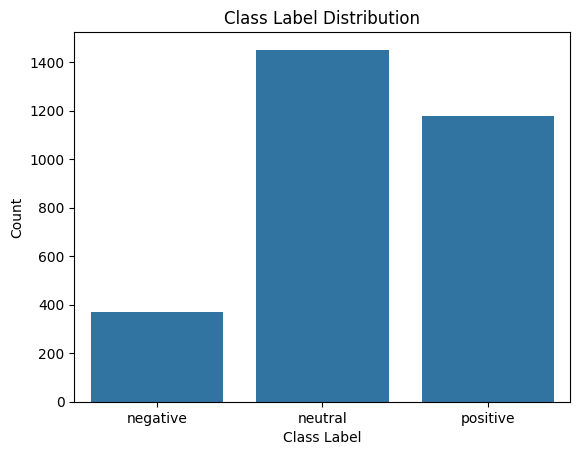

Jumlah baris kelas positif:  1178
Jumlah baris kelas negatif:  371


In [86]:
sns.barplot(data=c, x='class',y='class_Count')
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('Jumlah baris kelas positif: ',df_alltrain['class'].value_counts()['positive'])
print('Jumlah baris kelas negatif: ',df_alltrain['class'].value_counts()['negative'])

In [87]:
# menyusun data training dan testing
import random

trainsize = round(len(featuresets)*0.7)

random.shuffle(featuresets)
training_set = featuresets[:trainsize]
testing_set = featuresets[trainsize:]

## Pemodelan

### Melatih Model Naive Bayes

In [88]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(25)

Classifier accuracy percent: 63.77777777777778
Most Informative Features
                  cedera = True           negati : neutra =     55.3 : 1.0
                   alami = True           negati : neutra =     38.0 : 1.0
                    bahu = True           negati : neutra =     36.4 : 1.0
                  akibat = True           negati : neutra =     28.3 : 1.0
                    sial = True           negati : neutra =     28.3 : 1.0
                  sukses = True           positi : neutra =     24.3 : 1.0
                 masalah = True           negati : neutra =     22.9 : 1.0
                  tulang = True           negati : positi =     22.2 : 1.0
                   patah = True           negati : positi =     21.3 : 1.0
                    kutu = True           negati : positi =     20.9 : 1.0
                   crash = True           negati : positi =     18.9 : 1.0
                  celaka = True           negati : neutra =     17.9 : 1.0
                  madrid = 

#### Mengukur Knerja Model Naive Bayes

In [89]:
from nltk.metrics.scores import (precision, recall)
import collections

refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(testing_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

print('Recall:', recall(refsets['negative'], testsets['negative']))
print('Precision:', precision(refsets['negative'], testsets['negative']))

Recall: 0.4344262295081967
Precision: 0.5247524752475248


In [90]:
tclass = 'positive'
print('Target Class : ',tclass)
print('Recall:', recall(refsets[tclass], testsets[tclass]))
print('Precision:', precision(refsets[tclass], testsets[tclass]))

tclass = 'negative'
print('Target Class : ',tclass)
print('Recall:', recall(refsets[tclass], testsets[tclass]))
print('Precision:', precision(refsets[tclass], testsets[tclass]))

Target Class :  positive
Recall: 0.5341246290801187
Precision: 0.6896551724137931
Target Class :  negative
Recall: 0.4344262295081967
Precision: 0.5247524752475248


#### K-Fold Cross Validation

In [91]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False, random_state=None)

In [92]:
k=1
for traincv, testcv in cv.split(featuresets):
    training_sets = featuresets[traincv[0]:traincv[len(traincv)-1]]
    testing_sets = featuresets[testcv[0]:testcv[len(testcv)-1]]
    classifier = nltk.NaiveBayesClassifier.train(featuresets[traincv[0]:traincv[len(traincv)-1]])
    refsets = collections.defaultdict(set)
    testsets = collections.defaultdict(set)

    for i, (feats, label) in enumerate(testing_sets):
        refsets[label].add(i)
        observed = classifier.classify(feats)
        testsets[observed].add(i)
    print ("Fold - "+str(k))
    print("Accuracy:",(nltk.classify.accuracy(classifier, testing_sets))*100)
    print('Recall:', recall(refsets['negative'], testsets['negative'])*100)
    print('Precision:', precision(refsets['negative'], testsets['negative'])*100)
    k+=1

Fold - 1
Accuracy: 66.2771285475793
Recall: 55.88235294117647
Precision: 54.285714285714285
Fold - 2
Accuracy: 67.9465776293823
Recall: 57.534246575342465
Precision: 56.00000000000001
Fold - 3
Accuracy: 74.12353923205343
Recall: 68.4931506849315
Precision: 70.4225352112676
Fold - 4
Accuracy: 69.1151919866444
Recall: 60.526315789473685
Precision: 68.65671641791045
Fold - 5
Accuracy: 63.60601001669449
Recall: 43.20987654320987
Precision: 53.03030303030303


### Melatih Model SVM

In [93]:
from sklearn.svm import LinearSVC

In [94]:
from nltk.metrics import ConfusionMatrix

In [95]:
svclf = nltk.classify.SklearnClassifier(LinearSVC())
svclf.train(training_set)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


<SklearnClassifier(LinearSVC())>

In [96]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(svclf, testing_set))*100)

Classifier accuracy percent: 61.44444444444444


In [97]:
refs = []
tests = []

for i, (feats, label) in enumerate(testing_set):
    refs.append(label)
    observed = classifier.classify(feats)
    tests.append(observed)

In [98]:
cm = ConfusionMatrix(refs,tests)

In [99]:
print(cm)

         |   n       p |
         |   e   n   o |
         |   g   e   s |
         |   a   u   i |
         |   t   t   t |
         |   i   r   i |
         |   v   a   v |
         |   e   l   e |
---------+-------------+
negative | <58> 57   7 |
 neutral |  28<347> 66 |
positive |  17 132<188>|
---------+-------------+
(row = reference; col = test)



In [100]:
print(cm.evaluate())

     Tag | Prec.  | Recall | F-measure
---------+--------+--------+-----------
negative | 0.5631 | 0.4754 | 0.5156
 neutral | 0.6474 | 0.7868 | 0.7103
positive | 0.7203 | 0.5579 | 0.6288



### Melatih Model Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dtclf = nltk.classify.SklearnClassifier(DecisionTreeClassifier())
dtclf.train(training_set)

<SklearnClassifier(DecisionTreeClassifier())>

In [103]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(dtclf, testing_set))*100)

Classifier accuracy percent: 58.22222222222222


## Sentiment Analysis dengan Sklearn

In [104]:
dfcorpus['label'] = dfcorpus['event_sentiment'].map({'positive':1, 'negative':0, 'neutral':-1})

In [105]:
dfcorpus.head()

,caption,created_at,event_sentiment,circuit_sentiment,label
0,"""Five years ago, I had my most serious acciden...",2025-07-20 14.40.42,neutral,neutral,-1
1,Legenda balap motor Valentino Rossi tiba di Ja...,2025-09-30 20.54.12,positive,neutral,1
2,Menyusuri Sejarah Motorsport Indonesia di Muse...,2025-10-06 19.08.19,neutral,neutral,-1
3,Menteri Pemuda dan Olahraga Erick Thohir menye...,2025-10-05 12.39.53,positive,positive,1
4,Momen Pacu Jalur Rayyan Arkan Dikha Guncang Ma...,2025-10-04 20.21.14,positive,neutral,1


### BoW Count Vectorizer

In [106]:
import sklearn

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=50000)

In [109]:
X = [' '.join(a) for a in cleantweets]

In [110]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, dfcorpus['label'].values, test_size=0.2)

In [111]:
bowVect = bow_vectorizer.fit(Xtrain)

In [112]:
bowTrain = bowVect.transform(Xtrain)

In [113]:
feat = bow_vectorizer.get_feature_names_out()
feat[:100]

array(['_3_hati', '______', '________', '_____________',
       '__________________', 'aaaahhhh', 'abah', 'abang', 'abangku',
       'abdul', 'able', 'about', 'above', 'absen', 'absent', 'absolute',
       'absolutely', 'absurd', 'academy', 'acara', 'acaranya', 'access',
       'accident', 'accompanying', 'according', 'account', 'accurate',
       'aceh', 'achieved', 'achievements', 'acosta', 'action', 'actions',
       'activated', 'activation', 'actress', 'adakah', 'adalh', 'adanya',
       'adapt', 'adapting', 'adat', 'addicted', 'adds', 'adeguer', 'adek',
       'adem', 'adik', 'aditama', 'adiyasa', 'adjusted', 'admin',
       'adrenalin', 'adrenaline', 'adrian', 'aduk', 'adventure', 'advice',
       'aerodynamic', 'afford', 'afrika', 'after', 'afternoon',
       'afterwards', 'again', 'against', 'agara', 'agenda', 'agendanya',
       'agent', 'agostini', 'agree', 'aguilares', 'agung', 'ahad',
       'ahead', 'ahli_teknologi_pria', 'ahmad', 'airbnb', 'aircond',
       'airport', 'a

In [114]:
bowTest = bowVect.transform(Xtest)

### Pemodelan dengan BoW Dataset

In [115]:
from sklearn import ensemble

In [116]:
rfc = ensemble.RandomForestClassifier()

In [117]:
rfc.fit(bowTrain,ytrain)

RandomForestClassifier()

In [118]:
yrf = rfc.predict(bowTest)

In [119]:
from sklearn import metrics

In [120]:
print(metrics.classification_report(ytest, yrf))

              precision    recall  f1-score   support

          -1       0.60      0.81      0.69       280
           0       0.73      0.38      0.50        79
           1       0.64      0.47      0.54       241

    accuracy                           0.62       600
   macro avg       0.66      0.55      0.58       600
weighted avg       0.63      0.62      0.60       600



### TF IDF Vectorization

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [123]:
tfidf_vectorizer.fit(Xtrain)

TfidfVectorizer(max_features=5000)

In [124]:
tfidfTrain = tfidf_vectorizer.transform(Xtrain)

In [125]:
tfidfTest = tfidf_vectorizer.transform(Xtest)

### Pemodelan dengan TF-IDF Dataset

In [126]:
adaclf = ensemble.AdaBoostClassifier()

In [127]:
adaclf.fit(tfidfTrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [128]:
yada = adaclf.predict(tfidfTest)

In [129]:
print(metrics.classification_report(ytest,yada))

              precision    recall  f1-score   support

          -1       0.57      0.71      0.64       280
           0       0.56      0.39      0.46        79
           1       0.58      0.47      0.52       241

    accuracy                           0.57       600
   macro avg       0.57      0.53      0.54       600
weighted avg       0.58      0.57      0.57       600



## Menggunakan PyCaret

In [130]:
!python --version

Python 3.10.12


In [131]:
import pycaret
pycaret.__version__

'3.3.2'

In [132]:
from pycaret.classification import *

In [133]:
dftrain = pd.DataFrame(bowTrain.todense(), columns=list(bow_vectorizer.get_feature_names_out()))

In [134]:
dftrain['label'] = ytrain

In [135]:
dftrain.head()

,_3_hati,______,________,_____________,__________________,aaaahhhh,abah,abang,abangku,abdul,...,𝗡𝗧𝗕,𝗣𝗲𝗰𝗮𝗵,𝗣𝗲𝗻𝗼𝗻𝘁𝗼𝗻,𝗥𝗲𝗸𝗼𝗿,𝗥𝘂𝗺𝗮𝗵,𝗧𝘂𝗮𝗻,𝗧𝘂𝗻𝗷𝘂𝗸𝗸𝗮𝗻,𝗧𝘂𝗿𝗻,𝗨𝗻𝗯𝗲𝗹𝗶𝗲𝘃𝗮𝗯𝗹𝗲,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [136]:
dftrain.to_csv('bowtrain.csv', index=False)

##### Setup PyCaret

In [137]:
caret = setup(dftrain, target = 'label', session_id = 2)

,Description,Value
0,Session id,2
1,Target,label
2,Target type,Multiclass
3,Target mapping,"-1: 0, 0: 1, 1: 2"
4,Original data shape,"(2400, 6855)"
5,Transformed data shape,"(2400, 6855)"
6,Transformed train set shape,"(1680, 6855)"
7,Transformed test set shape,"(720, 6855)"
8,Numeric features,6854
9,Preprocess,True


##### Comparing Model

In [138]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6446,0.0000,0.6446,0.6442,0.6327,0.3744,0.3831,0.9640
svm,SVM - Linear Kernel,0.6220,0.0000,0.6220,0.6189,0.6160,0.3486,0.3520,0.3430
rf,Random Forest Classifier,0.6190,0.7585,0.6190,0.6256,0.6022,0.3205,0.3335,0.5720
et,Extra Trees Classifier,0.6185,0.7557,0.6185,0.6175,0.6095,0.3323,0.3372,0.8120
ridge,Ridge Classifier,0.6167,0.0000,0.6167,0.6187,0.6049,0.3275,0.3378,0.3470
gbc,Gradient Boosting Classifier,0.6107,0.0000,0.6107,0.6265,0.5863,0.2982,0.3219,2.3790
lightgbm,Light Gradient Boosting Machine,0.5851,0.6974,0.5851,0.5827,0.5756,0.2760,0.2817,0.6870
dt,Decision Tree Classifier,0.5762,0.6288,0.5762,0.5720,0.5676,0.2641,0.2675,0.3670
lda,Linear Discriminant Analysis,0.5738,0.0000,0.5738,0.5726,0.5648,0.2642,0.2696,0.7440
ada,Ada Boost Classifier,0.5393,0.0000,0.5393,0.5703,0.4770,0.1593,0.2017,0.6300


##### Hyperparameter Tuning

In [144]:
!pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


In [145]:
dt = create_model('xgboost')

ValueError: Estimator xgboost not available. Please see docstring for list of available estimators.

In [146]:
tuned_dt = tune_model(dt)

NameError: name 'dt' is not defined

In [ ]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=2, splitter='best')

In [ ]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=2, splitter='best')